https://www.youtube.com/watch?v=-ghTyCXxPm4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# read the CSV file
train_knight_df = pd.read_csv('/myvolume/subject/data/Train_knight.csv')

In [2]:
df = train_knight_df.copy().drop(columns=['knight'])
df['knight_num'] = train_knight_df['knight'].map({'Jedi': 1, 'Sith': 0})

# rename column kight_num to knight
df.rename(columns={'knight_num': 'knight'}, inplace=True)

correlation = df.corr(method='pearson')['knight'].sort_values(ascending=False, key=abs)
correlation.head()

knight        1.000000
Empowered     0.793652
Prescience    0.790066
Stims         0.786797
Recovery      0.777633
Name: knight, dtype: float64

In [3]:
empower_df = df[['Empowered', 'knight']]
empower_df.T

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
Empowered,0.05356,0.2388,0.1555,0.1416,0.02832,0.09181,0.1526,0.243,0.1613,0.08224,...,0.2105,0.151,0.07879,0.1126,0.09123,0.04419,0.07407,0.1218,0.09749,0.1941
knight,0.00000,1.0000,0.0000,0.0000,0.00000,1.00000,1.0000,1.000,1.0000,0.00000,...,1.0000,1.000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,1.0000


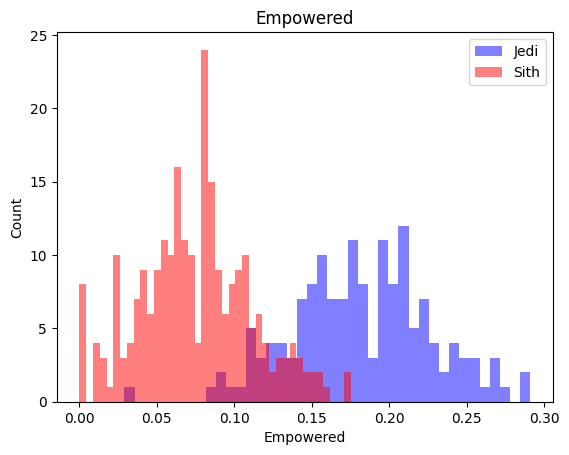

In [4]:

jedi_df = empower_df[empower_df['knight'] == 1]
sith_df = empower_df[empower_df['knight'] == 0]

# plot histogram Empowered
fig, ax = plt.subplots()
ax.hist(
    jedi_df['Empowered'], 
    color='blue', bins=40, alpha=0.5, histtype='barstacked')
ax.hist(
    sith_df['Empowered'], 
    color='red', bins=40, alpha=0.5, histtype='barstacked')
ax.set_title('Empowered')
ax.set_xlabel('Empowered')
ax.set_ylabel('Count')
ax.legend(['Jedi', 'Sith'])
plt.show()

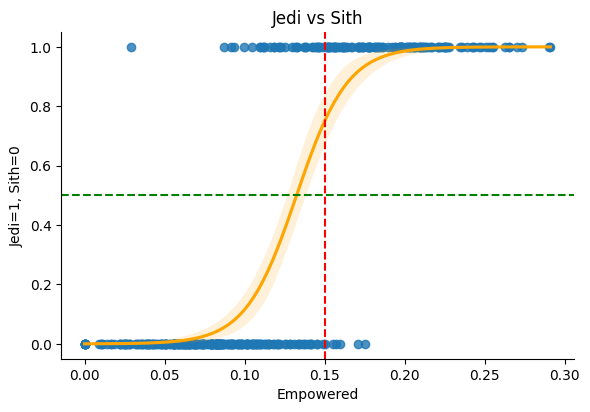

In [5]:
sns.lmplot(x='Empowered', y='knight', data=empower_df, logistic=True, height=4,
        aspect=1.5, line_kws={'color': 'orange'})
plt.axvline(x=0.15, color='red', linestyle='--')
plt.axhline(y=0.5, color='green', linestyle='--')
plt.title('Jedi vs Sith')
plt.xlabel('Empowered')
plt.ylabel('Jedi=1, Sith=0')
plt.show()

In [6]:
# split the data into train and test sets with knight as target
test_size = 0.001
X_train, X_test, y_train, y_test = train_test_split(
    empower_df[['Empowered']], empower_df['knight'], test_size=test_size, random_state=42
)

# print shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
# print shape of the data
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (397, 1)
X_test shape: (1, 1)
y_train shape: (397,)
y_test shape: (1,)


In [7]:
y_train.head()

396    0
33     0
208    0
93     0
84     0
Name: knight, dtype: int64

In [8]:
y_test.head()

198    0
Name: knight, dtype: int64

In [9]:
X_train.T

,396,33,208,93,84,373,94,222,126,9,...,214,121,397,20,188,71,106,270,348,102
Empowered,0.09749,0.0,0.04715,0.08449,0.05741,0.0866,0.07625,0.1785,0.182,0.08224,...,0.1974,0.1628,0.1941,0.1739,0.0829,0.2066,0.08411,0.05334,0.1312,0.05882


In [10]:
X_test.T

,198
Empowered,0.04603


In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
model.score(X_train, y_train)

0.7934508816120907

In [14]:
# predict row data from X_train it should be Jedi or Sith
predictions = model.predict(X_train)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# the real answer should be Jedi or Sith
y_train.values

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [16]:
# confuse matrix is return metrics 
# tn: True Negative (if result is Sith and prediction is Sith) 0,0
# fp: False Positive (if result is Sith and prediction is Jedi) 0,1
# fn: False Negative (if result is Jedi and prediction is Sith) 1,0
# tp: True Positive (if result is Jedi and prediction is Jedi) 1,1

# [[tn, fp],
#  [fn, tp]]

metrics.confusion_matrix(y_train, predictions)

array([[245,   0],
       [ 82,  70]])

In [17]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, predictions).ravel()

In [18]:
# accuracy is the ratio of correctly predicted instances to the total instances
# accuracy = (tp + tn) / (tn + fp + fn + tp)
accuracy = (tp + tn) / (tn + fp + fn + tp)
print(f"Accuracy: {accuracy:.2f}")
print(f"Accuracy: {metrics.accuracy_score(y_train, predictions):.2f}")

Accuracy: 0.79
Accuracy: 0.79


In [19]:
# precision is the ratio of correctly predicted positive observations to the total predicted positives
# precision = tp / (tp + fp)
precision = tp / (tp + fp)
print(f"Precision: {precision:.2f}")
print(f"Precision: {metrics.precision_score(y_train, predictions):.2f}")

Precision: 1.00
Precision: 1.00


In [20]:
# recall (sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class
# recall = tp / (tp + fn)
recall = tp / (tp + fn)
print(f"Recall: {recall:.2f}")
print(f"Recall: {metrics.recall_score(y_train, predictions):.2f}")

Recall: 0.46
Recall: 0.46


In [21]:
# F1 score is the weighted average of Precision and Recall
# F1 = 2 * (precision * recall) / (precision + recall)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.2f}")
print(f"F1 Score: {metrics.f1_score(y_train, predictions):.2f}")

F1 Score: 0.63
F1 Score: 0.63


In [22]:
print(metrics.classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       245
           1       1.00      0.46      0.63       152

    accuracy                           0.79       397
   macro avg       0.87      0.73      0.74       397
weighted avg       0.85      0.79      0.77       397



In [23]:
# make report like subject
test_size = 0.001
X_train, X_test, y_train, y_test = train_test_split(
    train_knight_df[['Empowered']], train_knight_df['knight'], test_size=test_size, random_state=42
)
model.fit(X_train, y_train)
predictions = model.predict(X_train)
print(metrics.classification_report(y_train, predictions))

              precision    recall  f1-score   support

        Jedi       1.00      0.46      0.63       152
        Sith       0.75      1.00      0.86       245

    accuracy                           0.79       397
   macro avg       0.87      0.73      0.74       397
weighted avg       0.85      0.79      0.77       397



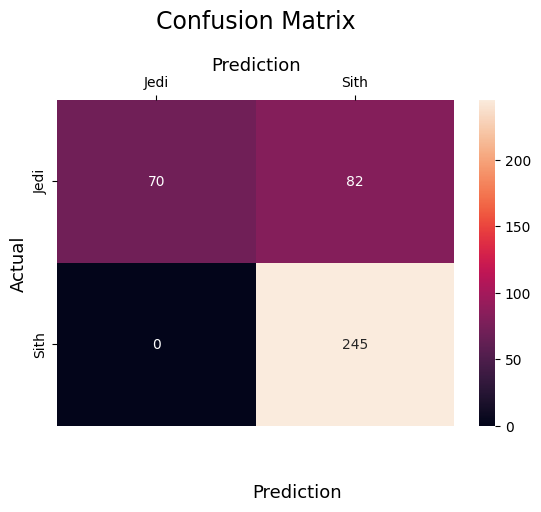

In [24]:
cm = metrics.confusion_matrix(y_train, predictions)
sns.heatmap(
    cm, 
    annot=True,
    fmt='g', 
    xticklabels=['Jedi','Sith'],
    yticklabels=['Jedi','Sith']
)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()